Install the Packages

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 110 kB 47.3 MB/s 
     |████████████████████████████████| 4.0 MB 54.8 MB/s 
     |████████████████████████████████| 128 kB 69.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 112 kB 63.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


Importing the libraries 

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Downloading data 

In [ ]:
sun = yf.Ticker("SUNPHARMA.NS")
df = sun.history(start='2021-09-15',end = '2022-12-16')

Calculation of Absolute price Oscillator 

The Absolute Price Oscillator displays the difference between two exponential moving averages of a security's price and is expressed as an absolute value.

APO = Shorter Period EMA – Longer Period EMA

In this case Short period EMA is for 12 days 
In this case Longer period EMA is for 26 days 

In [ ]:
def APO(df1):
 
    df1['ShortEMA']=df1['Close'].ewm(span=12, adjust=False).mean() 

 
    df1['LongEMA']= df1['Close'].ewm(span=26, adjust=False).mean() 


    df1['APO'] = df1['ShortEMA'] - df1['LongEMA']

    
    return df1

In [ ]:
APO(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ShortEMA,LongEMA,APO
Date,,,,,,,,,,
2021-09-15 00:00:00+05:30,776.008731,777.047090,770.174055,772.003601,1393824,0.0,0.0,772.003601,772.003601,0.000000
2021-09-16 00:00:00+05:30,771.360812,775.860404,769.679629,772.399170,1353677,0.0,0.0,772.064458,772.032902,0.031555
2021-09-17 00:00:00+05:30,776.305410,779.173314,758.158677,761.372681,4052622,0.0,0.0,770.419569,771.243256,-0.823687
2021-09-20 00:00:00+05:30,758.208070,766.168896,743.275281,748.121033,2206369,0.0,0.0,766.989025,769.530499,-2.541474
2021-09-21 00:00:00+05:30,748.121078,757.861956,742.731430,756.032471,2123997,0.0,0.0,765.303401,768.530645,-3.227244
...,...,...,...,...,...,...,...,...,...,...
2022-12-09 00:00:00+05:30,980.799988,997.000000,980.000000,992.849976,4231753,0.0,0.0,1018.894053,1015.840390,3.053663
2022-12-12 00:00:00+05:30,994.900024,995.000000,980.150024,987.400024,1875104,0.0,0.0,1014.048818,1013.733697,0.315121
2022-12-13 00:00:00+05:30,980.000000,996.349976,979.799988,994.650024,1863361,0.0,0.0,1011.064388,1012.320091,-1.255703


Ploting of APO and closed price of the Stock or index 



In [ ]:
def show_APO(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")

    # Plot the closing prices 
    axs[0].plot(df1['Close'],label='Close') 
    axs[0].legend(loc='upper left')
    axs[0].grid()
   
    axs[1].plot(df1['APO'], label='APO', color = 'blue')


    axs[1].legend(loc='upper left')
    axs[1].grid()


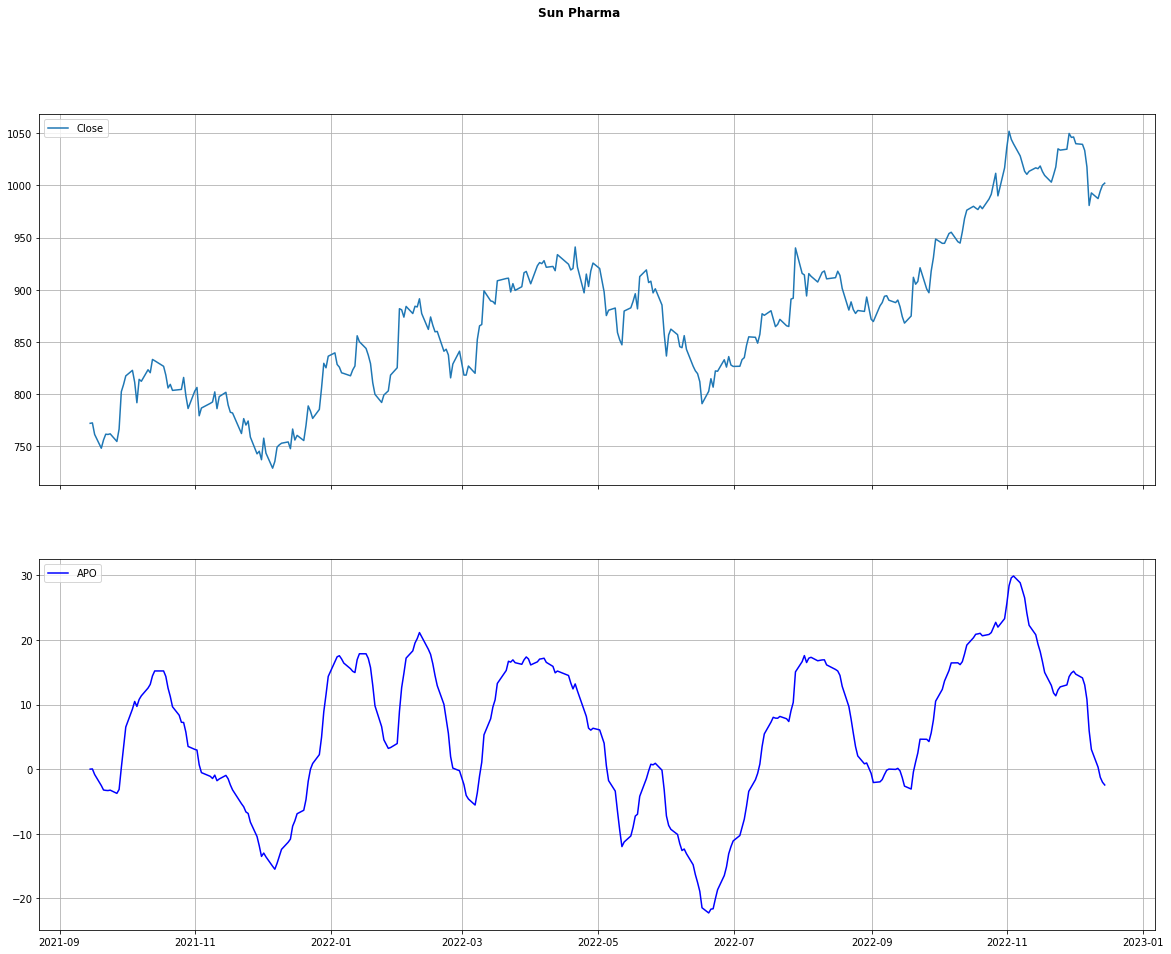

In [ ]:
show_APO(df, 'Sun Pharma')

# Strategy and Calculating return 
### Strategy 
buy  when APO becomes positive and 
sell when apo becomes negative 
### return calculation 
First made two list Buy and sell and then  will append the indices of  the  buys and sell signals in their  respective lists 
and after that merged them into a dataframe and calculated the returns 

In [ ]:
def find_returns_APO(dataset):
# Create empty lists to store buy and sell signals
  buy = []
  sell = []

 # Create a flag to track whether a position is currently open
  position = False

  
  for i in range(len(dataset)):
    if dataset.APO[i] >0:

      if position == False:
        buy.append(i)

        position = True

    elif dataset.APO[i] < 0:

      if position == True:
        sell.append(i)
        
        position = False
  # Concatenate the closing prices at the buy and sell signal indices from dataset1
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)
# Set the column names of the DataFrame to 'Buy' and 'Sell'
  merged.columns = ['Buy', 'Sell']

  totalprofit = merged.shift(-1).Sell-merged.Buy
  
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy
    
  print(merged)
#    uncomment for the number of trades 
  print ("return  =")
  return percent_profits.sum()

In [ ]:
find_returns_APO( df )

                                  Buy        Sell
Date                                             
2021-09-16 00:00:00+05:30  772.399170         NaN
2021-09-17 00:00:00+05:30         NaN  761.372681
2021-09-29 00:00:00+05:30  802.314087         NaN
2021-11-04 00:00:00+05:30         NaN  786.639709
2021-12-24 00:00:00+05:30  776.700989         NaN
2022-02-28 00:00:00+05:30         NaN  841.138428
2022-03-10 00:00:00+05:30  866.704468         NaN
2022-05-06 00:00:00+05:30         NaN  880.409485
2022-05-25 00:00:00+05:30  908.218201         NaN
2022-05-30 00:00:00+05:30         NaN  885.393127
2022-07-13 00:00:00+05:30  857.335266         NaN
2022-09-01 00:00:00+05:30         NaN  871.849976
2022-09-09 00:00:00+05:30  890.000000         NaN
2022-09-12 00:00:00+05:30         NaN  887.700012
2022-09-13 00:00:00+05:30  890.150024         NaN
2022-09-14 00:00:00+05:30         NaN  883.750000
2022-09-21 00:00:00+05:30  905.299988         NaN
2022-12-13 00:00:00+05:30         NaN  994.650024


0.1456845332563086